<a href="https://colab.research.google.com/github/xmpuspus/AIforSEA/blob/master/Lectures/notebooks/BankDataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Python Packages

In [0]:
# 4 important packages of python, import all of below everytime
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [0]:
# Loading excel files
# df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx', sheet_name='Type here the name of your Excel sheet')
# print (df)

In [0]:
data = pd.read_csv("bank_churn_modelling.csv") # loading data


# Looking at your Data

### About this file  
Given a Bank customer, can we investigate the factors that predict whether they will leave or not?

In [0]:
data.shape # Look at the number of (rows, columns)

(10000, 14)

In [0]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Types

In [0]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Selecting Subset of Columns

In [0]:
columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
subset_data = data[columns]

In [0]:
subset_data.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,619,42,2,0.00,101348.88
1,608,41,1,83807.86,112542.58
2,502,42,8,159660.80,113931.57
3,699,39,1,0.00,93826.63
4,850,43,2,125510.82,79084.10


# Descriptive Statistics

In [0]:
subset_data.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


# Correlation Coefficients

In [0]:
correlation_coefficients = subset_data.corr()
correlation_coefficients

,CreditScore,Age,Tenure,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,1.000000


# Correlation Heatmap

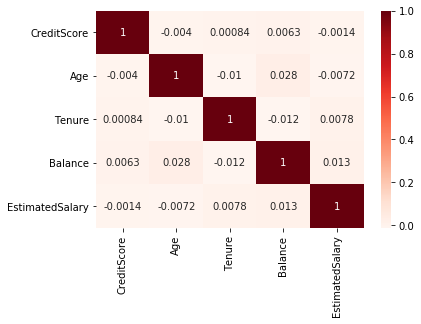

In [0]:
sns.heatmap(correlation_coefficients, annot=True, cmap='Reds')

# Answering Business Questions using Descriptive Analytics

### How old are our customers?

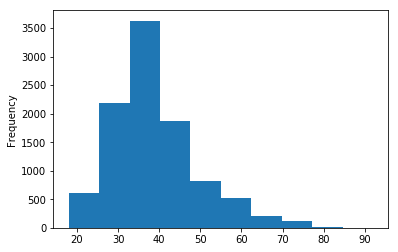

In [0]:
subset_data['Age'].plot.hist()

### Do older people have more money in the bank?

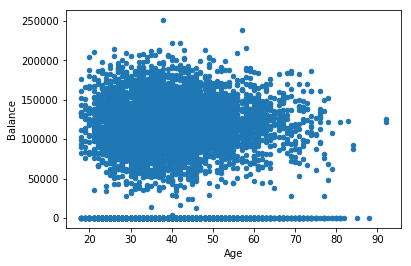

In [0]:
subset_data.plot.scatter(x='Age', y='Balance')

Answer: No clear trend.

# Do older people have higher salaries?

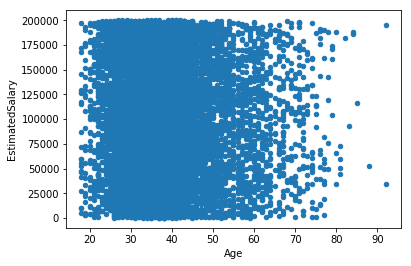

In [0]:
subset_data.plot.scatter(x='Age', y='EstimatedSalary')

No.

### Does tenure (length of being a customer in the bank) translate to higher balance?

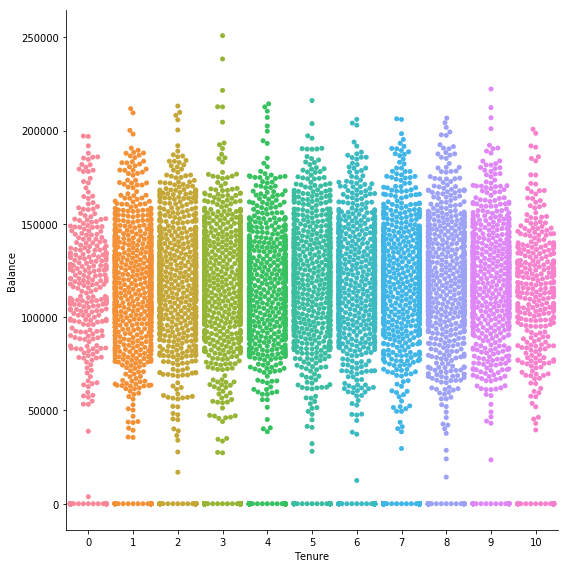

In [0]:
sns.catplot(data=subset_data,
            x='Tenure',
            y='Balance',
            kind='swarm',
           height=8)

Regardless of tenure, customer balances is varied.

# Distribution and Scatter Plots

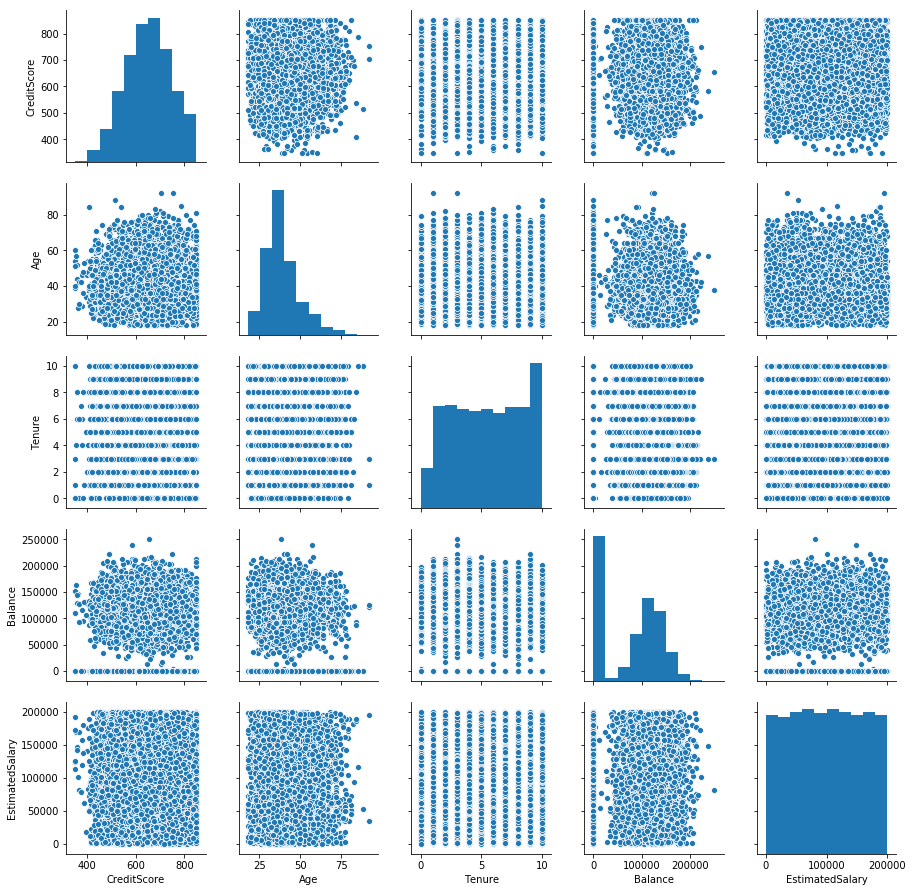

In [0]:
sns.pairplot(subset_data)

# Joint Plots

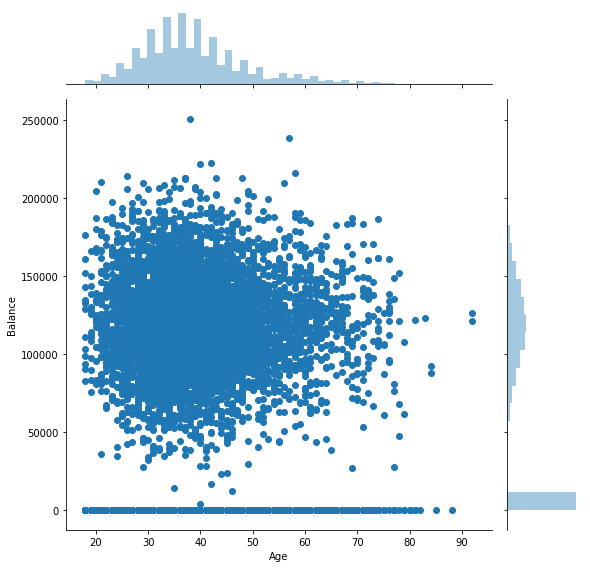

In [0]:
sns.jointplot(x='Age', y='Balance', data=subset_data, height=8)

# Box Plots

### Based on Age, who are more likely to churn?

In [0]:
data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


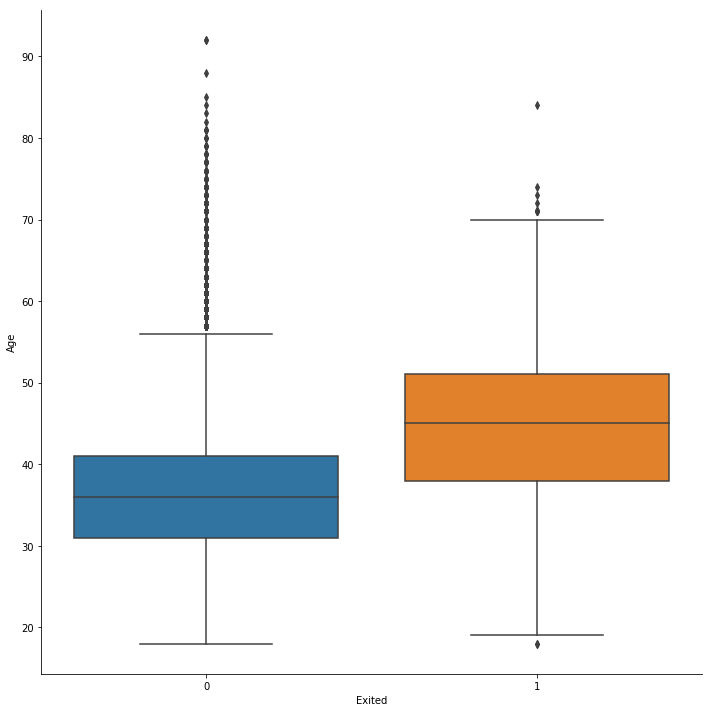

In [0]:
sns.catplot(x='Exited',
            y='Age',
            data=data,
            kind='box',
            height=10)

Looks like older people are more likely to leave the bank.

### Based on Estimated Salaries, who are more likely to churn?

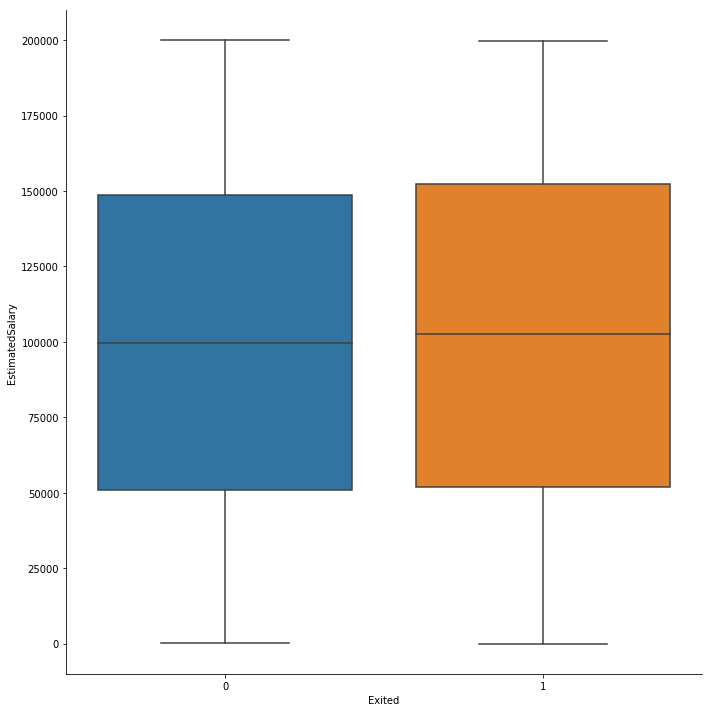

In [0]:
sns.catplot(x='Exited',
            y='EstimatedSalary',
            data=data,
            kind='box',
            height=10)

Salary doesn't necessarily relate to churn.

### Is credit score a factor of customer churn?

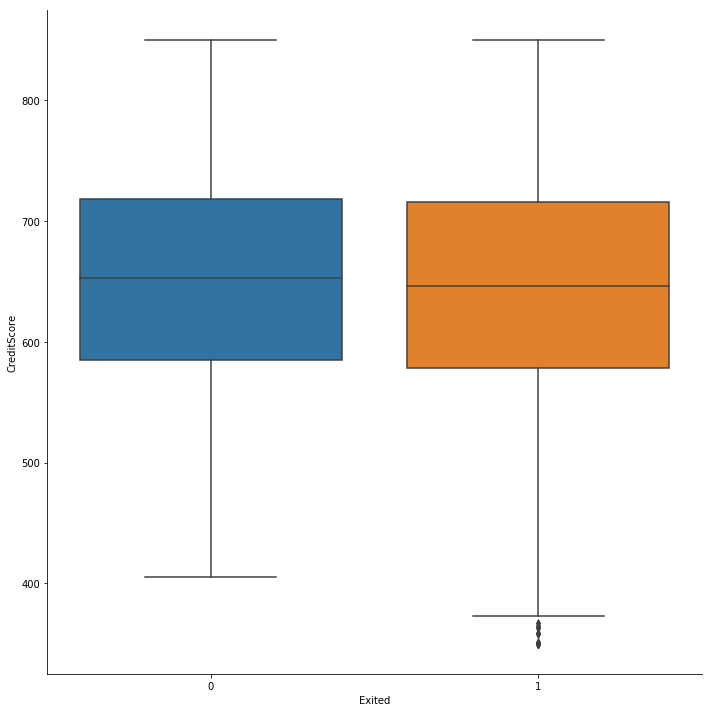

In [0]:
sns.catplot(y='CreditScore',
            x='Exited',
            data=data,
            kind='box',
            height=10)

Credit scores don't dictate customer churn.

# Violin Plots

Fancier Box Plots (optional)

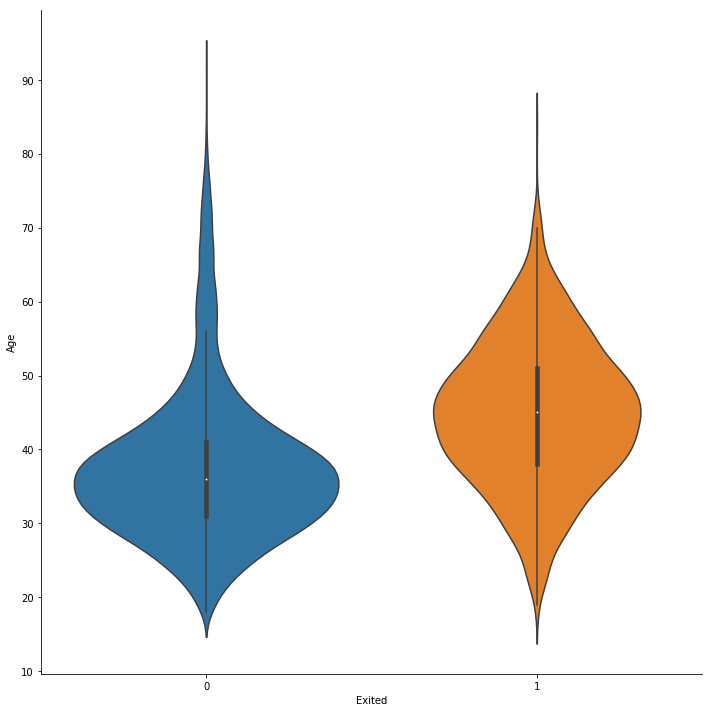

In [0]:
sns.catplot(x='Exited',
            y='Age',
            data=data,
            kind='violin',
            height=10)

# Exercise:
Re-do above with your capstone datasets (or a sample dataset we can provide). The aim of this exercise is to familiarize ourselves with different techniques we can use to answer business questions using descriptive statistics and descriptive analytics.

## Data Description on Other Dataset (Bank Marketing)

### Context
Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.  

### About this file  
This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

### Source  
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014